<a href="https://colab.research.google.com/github/jairautela98/Climbate-Change-Problem-with-its-Prediction-and-Detection-using-Data-Visualisation-and-ML-technique/blob/main/Climbate_Change_Problem_with_its_Prediction_and_Detection_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------
------------


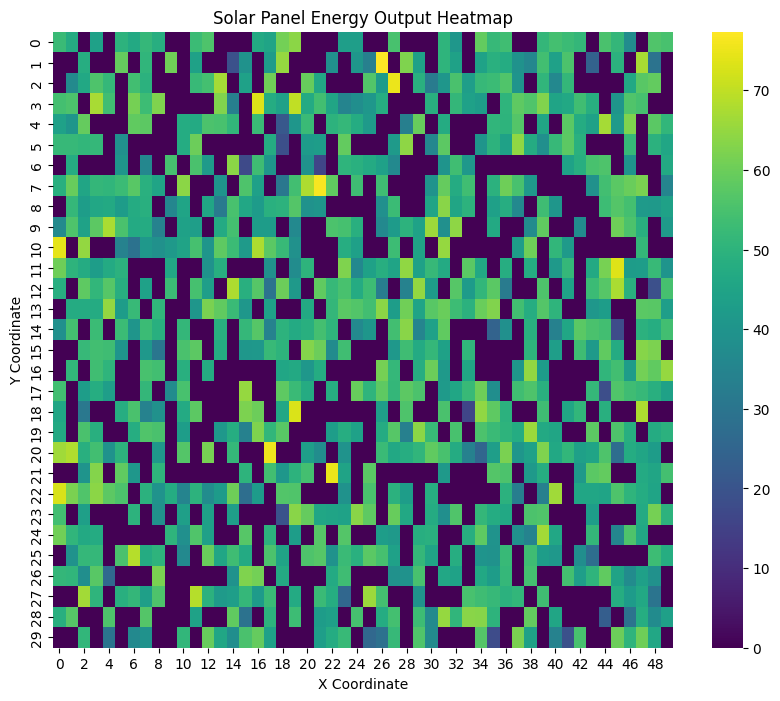


Energy Consumption Monitoring:
Potential energy consumption detected in the following panels:
      panel_id  energy_output
1            2      41.711325
3            4      43.025119
4            5      46.844242
5            6      43.083201
6            7      20.984567
...        ...            ...
1486      1487      44.610333
1493      1494      39.936659
1494      1495      39.068101
1495      1496      43.114152
1499      1500      41.994958

[691 rows x 2 columns]

Consuming column added to dataframe:
   panel_id  energy_output consuming
0         1      61.624951        no
1         2      41.711325       yes
2         3      56.381658        no
3         4      43.025119       yes
4         5      46.844242       yes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

def solar_panel_heatmap_and_monitoring(solar_data):
    """
    Generates a heatmap of solar panel data and performs basic monitoring
    to detect energy consumption.

    Args:
        solar_data (pd.DataFrame): DataFrame containing solar panel data.
                                    Expected columns: 'panel_id', 'x_coordinate',
                                    'y_coordinate', 'energy_output'.

    Returns:
        None (displays heatmap and monitoring results).
    """

    if not isinstance(solar_data, pd.DataFrame):
        print("Error: Input must be a pandas DataFrame.")
        return

    if not all(col in solar_data.columns for col in ['panel_id', 'x_coordinate', 'y_coordinate', 'energy_output']):
        print("Error: DataFrame must contain 'panel_id', 'x_coordinate', 'y_coordinate', and 'energy_output' columns.")
        return

    # 1. Heatmap Visualization
    pivot_table = solar_data.pivot_table(values='energy_output', index='y_coordinate', columns='x_coordinate', fill_value=0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, cmap='viridis', annot=False)
    plt.title('Solar Panel Energy Output Heatmap')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

    # 2. Basic Energy Consumption Monitoring (using KMeans as a simple anomaly detector)
    # create a pandas dataframe for clustering.
    clustering_data = solar_data[['energy_output']]

    # Simple KMeans clustering to identify potential outliers
    kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming two states: normal and low output (potential consumption)
    solar_data['cluster'] = kmeans.fit_predict(clustering_data)

    # Analyze cluster characteristics (mean energy output)
    cluster_means = solar_data.groupby('cluster')['energy_output'].mean()

    # Determine which cluster represents lower energy output (potential consumption)
    consumption_cluster = cluster_means.idxmin()

    # Identify panels in the consumption cluster
    consuming_panels = solar_data[solar_data['cluster'] == consumption_cluster]

    print("\nEnergy Consumption Monitoring:")
    if not consuming_panels.empty:
        print("Potential energy consumption detected in the following panels:")
        print(consuming_panels[['panel_id', 'energy_output']])

        # Add a simple 'consuming' yes/no column.
        solar_data['consuming'] = np.where(solar_data['cluster'] == consumption_cluster, 'yes', 'no')
        print("\nConsuming column added to dataframe:")
        print(solar_data[['panel_id', 'energy_output', 'consuming']].head())

    else:
        print("No significant energy consumption detected.")

# Example Usage (Generating dummy data for 1500 panels)
num_panels = 1500
x_coords = np.random.randint(0, 50, num_panels)
y_coords = np.random.randint(0, 30, num_panels)
energy_outputs = np.random.normal(50, 10, num_panels)  # Normal distribution for energy output
panel_ids = range(1, num_panels + 1)

solar_data_example = pd.DataFrame({
    'panel_id': panel_ids,
    'x_coordinate': x_coords,
    'y_coordinate': y_coords,
    'energy_output': energy_outputs
})

# Introduce some simulated consumption (lower energy output)
consumption_indices = np.random.choice(num_panels, size=50, replace=False)
solar_data_example.loc[consumption_indices, 'energy_output'] = np.random.normal(20, 5, 50) # lower output.

solar_panel_heatmap_and_monitoring(solar_data_example)

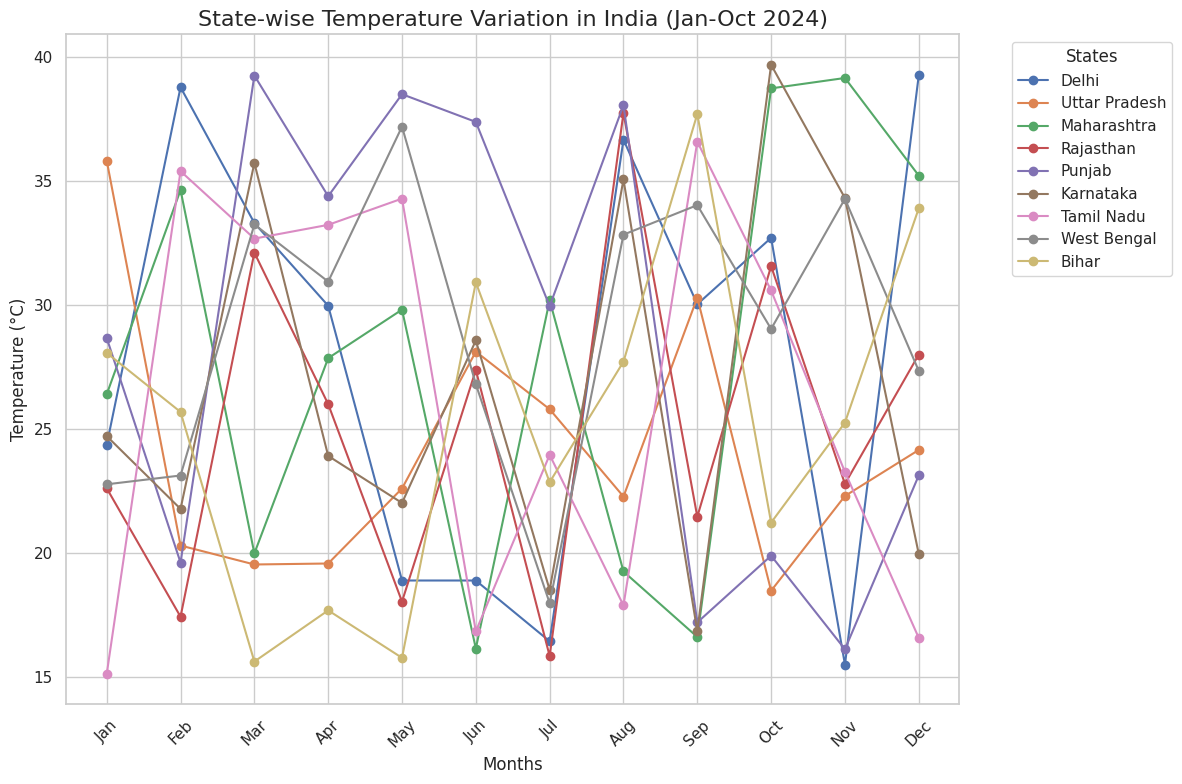

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize random seed for reproducibility 2024
np.random.seed(42)

# List of some Indian states
states = ['Delhi', 'Uttar Pradesh', 'Maharashtra', 'Rajasthan', 'Punjab', 'Karnataka', 'Tamil Nadu', 'West Bengal', 'Bihar']

# Months from January to October
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']

# Generate random temperature data for each state for the months from Jan to Oct
temperature_data = {state: np.random.uniform(15, 40, len(months)) for state in states}

# Create a DataFrame
df = pd.DataFrame(temperature_data, index=months)

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Line plot for each state
for state in states:
    plt.plot(months, df[state], marker='o', label=state)

plt.title('State-wise Temperature Variation in India (Jan-Oct 2024)', fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Load hypothetical historical climate dataset (from 2000 to 2023)
# Features: Year, CO2 Levels, Sea Levels, and Temperature
data = pd.DataFrame({
    'Year': np.arange(2000, 2024),
    'Temperature': np.random.uniform(14, 16, 24),  # Random temperature data (°C)
    'CO2_Level': np.random.uniform(300, 450, 24),  # Random CO2 levels (ppm)
    'Sea_Level': np.random.uniform(3, 4, 24),      # Random sea level data (m)
    'Critical_CO2_Exceeded': np.random.randint(0, 2, 24)  # Random binary outcome for logistic regression
})

# Features and targets for regression models
X = data[['Year', 'CO2_Level', 'Sea_Level']]  # Features
y_linear = data['Temperature']                # Target for Linear Regression
y_logistic = data['Critical_CO2_Exceeded']    # Target for Logistic Regression

# Split dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train_linear, y_test_linear = train_test_split(X, y_linear, test_size=0.2, random_state=42)
_, _, y_train_logistic, y_test_logistic = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

# Standardize features for both models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------- Linear Regression -------- #
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_linear)

# Predict temperature for 2024 to 2033 (next 10 years)
future_years = np.array([[2024, 410, 3.7], [2025, 415, 3.8], [2026, 420, 3.9],
                         [2027, 425, 4.0], [2028, 430, 4.1], [2029, 435, 4.2],
                         [2030, 440, 4.3], [2031, 445, 4.4], [2032, 450, 4.5],
                         [2033, 455, 4.6]])

future_years_scaled = scaler.transform(future_years)
temperature_predictions = linear_model.predict(future_years_scaled)
print("Predicted Temperature for 2024-2033:", temperature_predictions)

# Evaluate Linear Regression model on test data
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
print(f"Linear Regression Mean Squared Error: {mse_linear}")

# -------- Logistic Regression -------- #
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train_logistic)

# Predict whether CO2 threshold (e.g., 450 ppm) will be exceeded in 2024 to 2033
threshold_exceeded_predictions = logistic_model.predict(future_years_scaled)
print("CO2 Threshold Exceeded Predictions (2024-2033):", threshold_exceeded_predictions)

# Evaluate Logistic Regression model on test data
y_pred_logistic = logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")


Predicted Temperature for 2024-2033: [15.02192594 14.9906555  14.95938506 14.92811462 14.89684419 14.86557375
 14.83430331 14.80303287 14.77176243 14.74049199]
Linear Regression Mean Squared Error: 0.3947222765876638
CO2 Threshold Exceeded Predictions (2024-2033): [1 1 1 1 1 1 1 1 1 1]
Logistic Regression Accuracy: 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


 Low Rate of Accurate output Vision and Track and give High Resolution or clear Output

In [ ]:
# Later in the advanced section of this tutorial (section 3.2), we will be analyzing
# zarr data format, and the pre-installed xarray on google colab is not able to
# do so. Thus, we need to intall the complete version of xarray to be able to do it.
!pip install xarray[complete] # this may take a few seconds

In [ ]:
# Update to code ( Nov, 2024): It seems that the updated xarray library runs
# into an error when trying to open a netcdf dataset. I searched for the issue,
# and it seems we need to downgrade the importlib-metadata library to make the
# libraries compatible.
!pip install importlib-metadata==4.13.0

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 8.2.0
    Uninstalling importlib_metadata-8.2.0:
      Successfully uninstalled importlib_metadata-8.2.0


In [ ]:
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr

In [ ]:
for yr in range(2011,2015): # note that in python, the end range is not inclusive. So, in this case data for 2015 is not downloaded.
    url = f'https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.{yr}.nc'
    savename = url.split('/')[-1]
    urllib.request.urlretrieve(url,savename)

Let's start simple: open data for two years and concatenate them to one file:

In [ ]:
ds2022 = xr.open_dataset('precip.V1.0.2011.nc')
ds2012 = xr.open_dataset('precip.V1.0.2012.nc')

NameError: name 'xr' is not defined

In [ ]:
ds2011

NameError: name 'ds2011' is not defined

In [ ]:
ds2012

<xarray.Dataset> Size: 53MB
Dimensions:  (lat: 120, lon: 300, time: 366)
Coordinates:
  * lat      (lat) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
  * lon      (lon) float32 1kB 230.1 230.4 230.6 230.9 ... 304.4 304.6 304.9
  * time     (time) datetime64[ns] 3kB 2012-01-01 2012-01-02 ... 2012-12-31
Data variables:
    precip   (time, lat, lon) float32 53MB ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [ ]:
ds2011_2012 = xr.concat([ds2011,ds2012], dim='time')

In [ ]:
ds2011_2012

<xarray.Dataset> Size: 105MB
Dimensions:  (time: 731, lat: 120, lon: 300)
Coordinates:
  * lat      (lat) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
  * lon      (lon) float32 1kB 230.1 230.4 230.6 230.9 ... 304.4 304.6 304.9
  * time     (time) datetime64[ns] 6kB 2011-01-01 2011-01-02 ... 2012-12-31
Data variables:
    precip   (time, lat, lon) float32 105MB nan nan nan nan ... nan nan nan nan
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

Now, let's try something similar, but through a more efficient way (especially if the number of files are more than two):

In [ ]:
ds2011_2014 = xr.open_mfdataset('precip.V1.0.*.nc', concat_dim='time', combine='nested')
# Or, you can use the following command to do the same thing:
# ds2011_2014 = xr.open_mfdataset('precip*.nc', combine='by_coords')

In [ ]:
ds2011_2014

<xarray.Dataset> Size: 210MB
Dimensions:  (time: 1461, lat: 120, lon: 300)
Coordinates:
  * lat      (lat) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
  * lon      (lon) float32 1kB 230.1 230.4 230.6 230.9 ... 304.4 304.6 304.9
  * time     (time) datetime64[ns] 12kB 2011-01-01 2011-01-02 ... 2014-12-31
Data variables:
    precip   (time, lat, lon) float32 210MB dask.array<chunksize=(1, 120, 300), meta=np.ndarray>
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

Now let's focus on 2024 and extract the monthly precipitation sum and make a simple plot of one of the months:

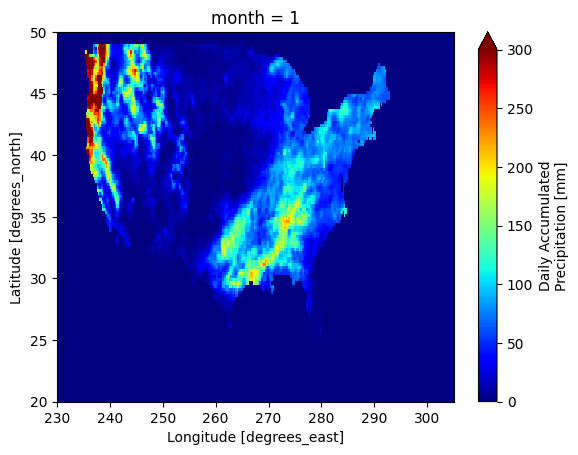

In [ ]:
# The great thing about groupby is that you do not need to worry about the leap years or
# number of days in each month.
# In addition, xarray is label-aware and when you pass the plot function, it understands that you want to
# make a spatial plot and finds the lat and lon values and the appropriate title and labels.
ds2012_mon = ds2012.groupby('time.month').sum()
ds2012_mon.precip[0,:,:].plot(cmap='jet', vmax=300)

The above plot is quite simple and not high quality (e.g. the areas outside the US boundary had no data and are all shown in dark blue, both x & y axis limits are a bit large and can be narrowed down, the title is not exactly what we may like, etc.). We will now develop a more personalized plot for all the 12 months as follows:

In [ ]:
import calendar # We'll use this library to easily add month name to subplot titles.

In [ ]:
# First, We will develop a land mask data array that we can use to mask out the nan values:
landmask = ds2012.precip.sum(dim='time')>0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mord import LogisticAT
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Simulated Dataset Creation
# Replace this with a real dataset if available
data = {
    'Screen_Time': np.random.randint(2, 12, 200),  # Daily screen time in hours
    'Sleep_Quality': np.random.randint(1, 5, 200),  # 1: Very poor, 5: Excellent
    'Anxiety_Level': np.random.randint(1, 10, 200),  # Scale 1-10
    'Productivity_Loss': np.random.randint(1, 10, 200),  # Scale 1-10
    'Addiction_Severity': np.random.choice(['Mild', 'Moderate', 'Severe'], 200)  # Target labels
}

df = pd.DataFrame(data)

# Map ordinal target labels to numerical values
severity_mapping = {'Mild': 1, 'Moderate': 2, 'Severe': 3}
df['Addiction_Severity_Num'] = df['Addiction_Severity'].map(severity_mapping)

# Step 2: Splitting Dataset
X = df[['Screen_Time', 'Sleep_Quality', 'Anxiety_Level', 'Productivity_Loss']]
y = df['Addiction_Severity_Num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
model = LogisticAT(alpha=1.0)  # Ordinal logistic regression from `mord`
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Mild', 'Moderate', 'Severe']))

# Step 5: Analysis of Results
# Placeholder for feature importance as `mord` doesn't provide this directly
print("Feature importance visualization is not supported directly by `mord`.")


ModuleNotFoundError: No module named 'mord'

Now let's say we want to extract data for a specific boundary and look at the average condition within that area of interest. For simplicity, we can think of a rectangular box (but you can easily develop any landmask as above and use it to focus on only your domain of interest). For this case, let's look at a rectangular box almost similar to the state of Kansas.

In [ ]:
top = 40
bottom = 37
left = 258
right = 265.4

In [ ]:
ds_sel = ds2011_2014.sel(lon=slice(left,right), lat=slice(bottom, top))
ds_sel_avg = ds_sel.mean(dim=['lat','lon'])

Now let's plot the cumulative daily precipitation of the selected area for each year. To make things easier, let's drop Feb 29th from any leap years in the record. Here we go:

In [ ]:
ds_sel_avg_noleap = ds_sel_avg.sel(
    time=~((ds_sel_avg.time.dt.month == 2) & (ds_sel_avg.time.dt.day == 29)))

In [ ]:
# Here's how the result will look like:
ds_sel_avg_noleap

<xarray.Dataset> Size: 18kB
Dimensions:  (time: 1460)
Coordinates:
  * time     (time) datetime64[ns] 12kB 2011-01-01 2011-01-02 ... 2014-12-31
Data variables:
    precip   (time) float32 6kB dask.array<chunksize=(1,), meta=np.ndarray>

In [ ]:
# Now we can easily save that output as a netcdf file using xarray:
ds_sel_avg_noleap.to_netcdf('ds_prec_Kansas_noleap_2011_2014.nc')

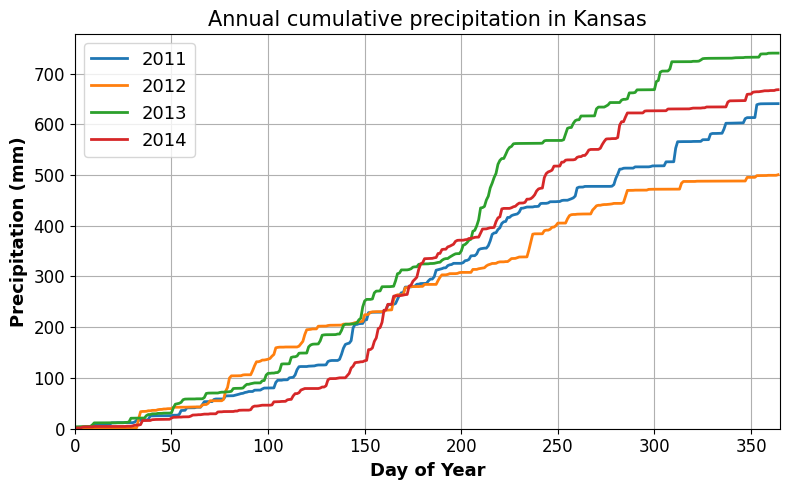

In [ ]:
fig = plt.figure(figsize=[8,5], facecolor='w')
for yr in range(2011,2015):
    da_yr = ds_sel_avg_noleap.sel(time = str(yr)).precip
    dataplot = da_yr.cumsum()
    plt.plot(dataplot, linewidth=2, label = yr)
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12) # we can also change the ticks to be on Jan-1, Feb-1, etc. but I'll skip it for here.
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Day of Year', fontsize = 13, fontweight = 'bold')
plt.xlim([0,365])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation in Kansas', fontsize=15)
plt.tight_layout()
plt.savefig('Fig_cumsum_prec_Kansas.png', format = 'png', dpi = 300)

We could also do a little more modification to revise the xticklabels and show the exact month and day values (instead of julian day number). See if you can figure it out yourself.

-------------------------------------------------------------
-------------------------------------------------------------


In [ ]:
# I import the libraries again, to keep the examples separate from each other (in case someone wants to start from here).
import urllib.request
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import pandas as pd

Let's download the two datasets for 2021:


In [ ]:
# Downloading GridMet tmin (1/24 deg, ~4km):
url = 'https://www.northwestknowledge.net/metdata/data/tmmn_2021.nc'
savename = 'tmin_gridmet_2021.nc'
urllib.request.urlretrieve(url, savename)

# Downloading CPC-Globe tmin (0.5 deg, ~50km):
url = 'https://downloads.psl.noaa.gov/Datasets/cpc_global_temp/tmin.2021.nc'
savename = 'tmin_CPC_2021.nc'
urllib.request.urlretrieve(url, savename)

('tmin_CPC_2021.nc', <http.client.HTTPMessage at 0x7e21c3b38700>)

In [ ]:
# Now lets open the two datasets and explore them:
ds_gridmet = xr.open_dataset('tmin_gridmet_2021.nc')
ds_CPC = xr.open_dataset('tmin_CPC_2021.nc')

In [ ]:
ds_gridmet

<xarray.Dataset> Size: 2GB
Dimensions:          (lon: 1386, lat: 585, day: 365, crs: 1)
Coordinates:
  * lon              (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.1 -67.06
  * lat              (lat) float64 5kB 49.4 49.36 49.32 ... 25.15 25.11 25.07
  * day              (day) datetime64[ns] 3kB 2021-01-01 ... 2021-12-31
  * crs              (crs) uint16 2B 3
Data variables:
    air_temperature  (day, lat, lon) float64 2GB ...
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       30 March 2023
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [ ]:
ds_CPC

<xarray.Dataset> Size: 378MB
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
Data variables:
    tmin     (time, lat, lon) float32 378MB ...
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    version:        V1.0
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    history:        Updated 2022-01-01 16:55:57

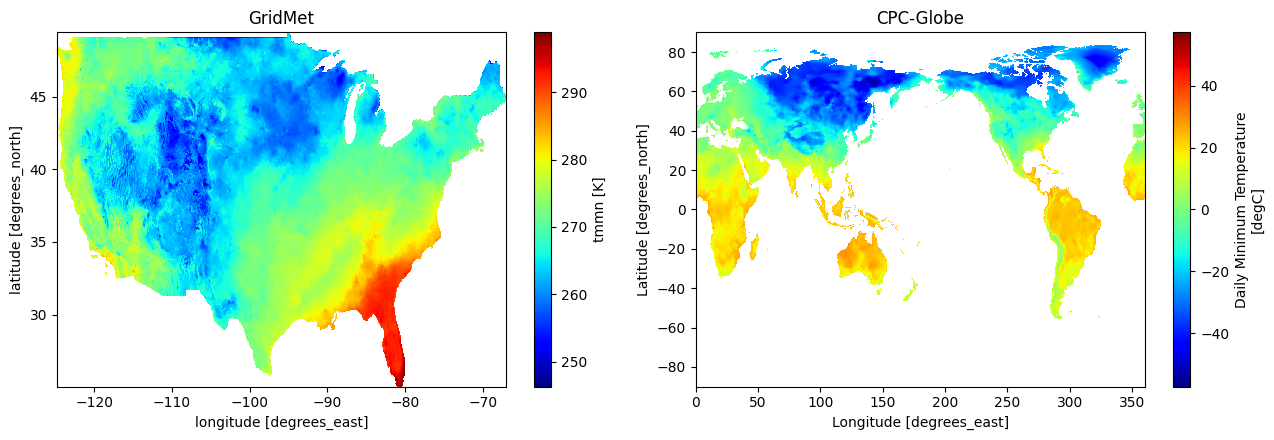

In [ ]:
# Let's plot the original data for Jan 1st:
fig = plt.figure(figsize = [13,4.5])
plt.subplot(1,2,1)
ds_gridmet.air_temperature[0,:,:].plot(cmap = 'jet')
plt.title('GridMet')
plt.subplot(1,2,2)
ds_CPC.tmin[0,:,:].plot(cmap = 'jet')
plt.title('CPC-Globe')
plt.tight_layout()

Looking at the two datasets, we see that there are a few differences that should be addressed:
+ In the gridmet dataset, the "crs" coordinate can be dropped, and the "day" coordinate can be renamed to "time" to be consistent with the CPC dataset (similarly for "air_temperature").
+ The gridmet data is in Kelvin, but CPC is in Celcius. Let's convert gridmet data to Celcius.
+ In addition, the lon coordinate in one dataset is 0:360 and -180:180 in the other one. Let's change that to 0:360 for the gridmet data.
+ Lastly, let's interpolate the finer resolution data (gridmet) to the CPC-Globe spatial resolution.

In [ ]:
ds_gridmet_revised = ds_gridmet.drop('crs').rename({'day':'time', 'air_temperature':'tmin'})
ds_gridmet_revised = ds_gridmet_revised-273.15 # Convert Kelvin to Celcius
lon_revised = ds_gridmet.lon + (ds_gridmet.lon < 0)*360
ds_gridmet_revised = ds_gridmet_revised.assign_coords(lon = lon_revised)

<ipython-input-6-4c240538214a>:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds_gridmet_revised = ds_gridmet.drop('crs').rename({'day':'time', 'air_temperature':'tmin'})


In [ ]:
ds_gridmet_revised

<xarray.Dataset> Size: 2GB
Dimensions:  (lat: 585, time: 365, lon: 1386)
Coordinates:
  * lat      (lat) float64 5kB 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * time     (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
  * lon      (lon) float64 11kB 235.2 235.3 235.3 235.4 ... 292.9 292.9 292.9
Data variables:
    tmin     (time, lat, lon) float64 2GB nan nan nan nan ... nan nan nan nan
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       30 March 2023
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [ ]:
# The memory was crashing to proceed from here. Therefore, let's delete the
# variable ds_gridmet which is not going to be used anymore.
del ds_gridmet

In [ ]:
# This one seems to crash the memory.
# ds_gridmet_interp = ds_gridmet_revised.interp(lat = ds_CPC.lat, lon = ds_CPC.lon)

In [ ]:
ds_gridmet_revised

<xarray.Dataset> Size: 2GB
Dimensions:  (lat: 585, time: 365, lon: 1386)
Coordinates:
  * lat      (lat) float64 5kB 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * lon      (lon) float64 11kB 235.2 235.3 235.3 235.4 ... 292.9 292.9 292.9
  * time     (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
Data variables:
    tmin     (time, lat, lon) float64 2GB nan nan nan nan ... nan nan nan nan
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       30 March 2023
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [ ]:
ds_gridmet_revised = ds_gridmet_revised.assign_coords(
    time = pd.to_datetime(ds_gridmet_revised.time))
ds_CPC = ds_CPC.assign_coords(
    time = pd.to_datetime(ds_CPC.time))

In [ ]:
target_date = datetime.date(2021,2,16)
target_date = pd.to_datetime(target_date)

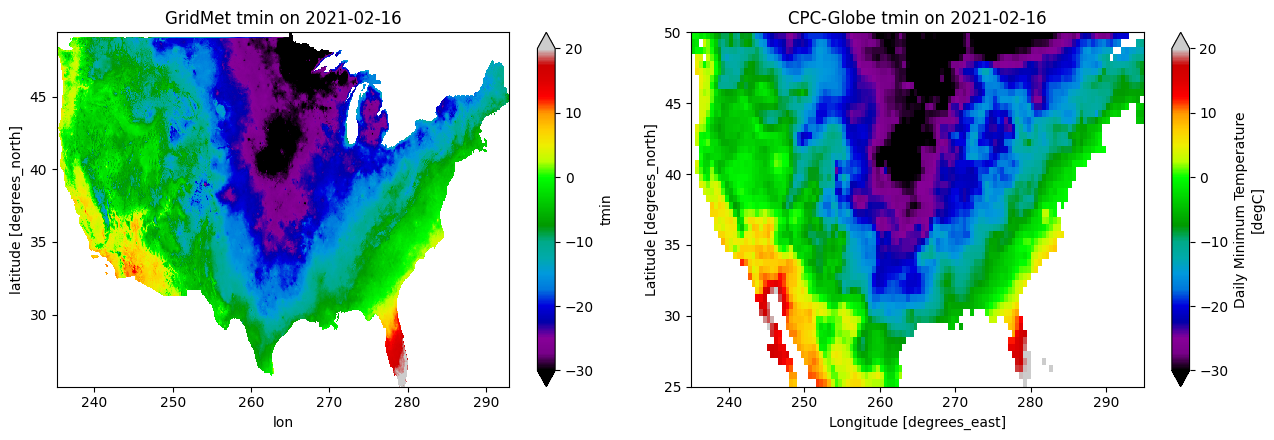

In [ ]:
fig = plt.figure(figsize = [13,4.5], facecolor='w')
plt.subplot(1,2,1)
ds_gridmet_revised.sel(time=target_date).tmin.plot(
    cmap = 'nipy_spectral', vmin = -30, vmax = 20)
plt.title(f'GridMet tmin on {target_date.strftime("%Y-%m-%d")}')

plt.subplot(1,2,2)
ds_CPC.sel(time=target_date).tmin.plot(
    cmap = 'nipy_spectral', vmin = -30, vmax = 20)
plt.title(f'CPC-Globe tmin on {target_date.strftime("%Y-%m-%d")}')
plt.xlim([235,295])
plt.ylim([25,50])
plt.tight_layout()

It can be seen that the interpolated data (CPC plot shown on right) does not necessarily have the details (specially the orographic and elevation effects) of the finer resolution data.

Now let's find the spatial mean of both datasets around Austin, TX. Again, to make it simpler, I defined an estimate rectangular boundary that we will use.

In [ ]:
# Estimated boundaries for Delhi :
left = 360 - 97.9
right = 360 - 97.6
top = 30.5
bottom = 30.2

In [ ]:
ds_Austin_gridmet = ds_gridmet_revised.isel(
    lon=(ds_gridmet_revised.lon >= left) & (ds_gridmet_revised.lon <= right),
    lat=(ds_gridmet_revised.lat >= bottom) & (ds_gridmet_revised.lat <= top),
).mean(dim=['lat','lon'])
ds_Austin_CPC = ds_CPC.isel(
    lon=(ds_CPC.lon >= left) & (ds_CPC.lon <= right),
    lat=(ds_CPC.lat >= bottom) & (ds_CPC.lat <= top),
).mean(dim=['lat','lon'])

Now let's plot the two timeseries, but this time in degrees fahrenheit:

In [ ]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Sample data
ds_India_gridmet = np.random.rand(365)
ds_India_CPC = np.random.rand(365)

plt.figure(figsize=(12, 6))
(ds_India_gridmet * 1.8 + 32).plot(label='GridMet', color='r')
(ds_India_CPC * 1.8 + 32).plot(label='CPC', color='b')
plt.grid(axis='y')
plt.xticks(ticks=[datetime.date(2021, x, 1) for x in range(1, 13)], fontsize=12)
plt.xlim([datetime.date(2021, 1, 1), datetime.date(2021, 12, 31)])
plt.yticks(fontsize=13)
plt.ylabel('Minimum air temperature (Tmin, °F)', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.legend(fontsize=13, loc='upper left')
plt.title('India, TX', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

<Figure size 1200x600 with 0 Axes>

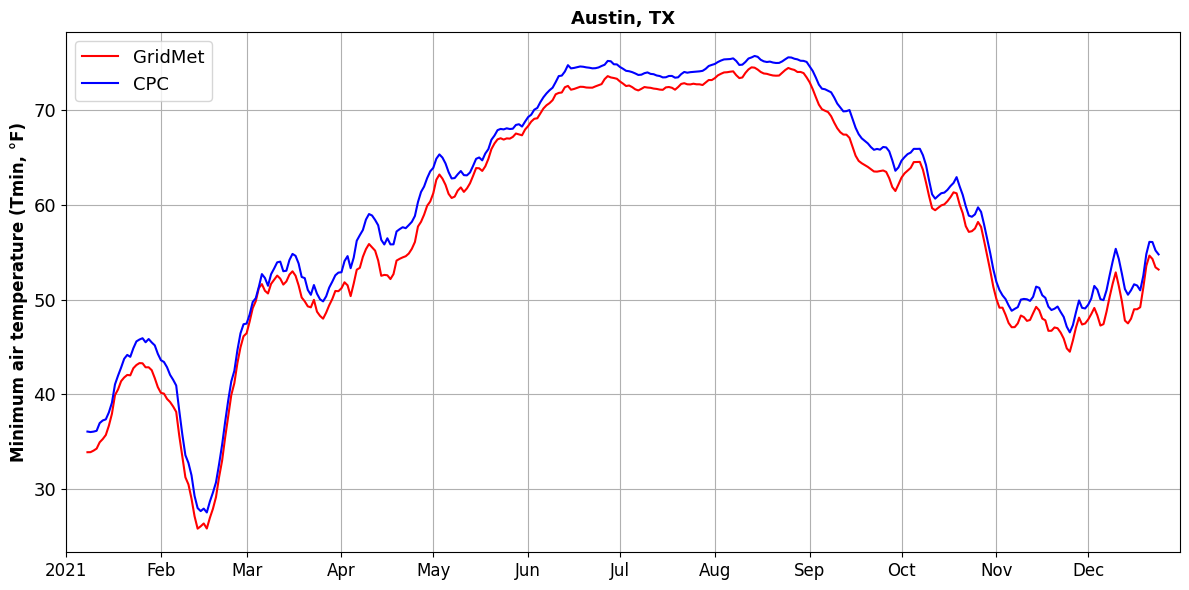

In [ ]:
plt.figure(figsize = [12,6])
(ds_Austin_gridmet.tmin*1.8 + 32).rolling(time=15,center=True).mean().plot(label = 'GridMet', color = 'r')
(ds_Austin_CPC.tmin*1.8 + 32).rolling(time=15,center=True).mean().plot(label = 'CPC', color = 'b')
plt.grid()
plt.xticks(ticks = [datetime.date(2021,x,1) for x in range(1,13)], fontsize=12)
plt.xlim([datetime.date(2021,1,1), datetime.date(2021,12,31)])
plt.yticks(fontsize=13)
plt.ylabel('Minimum air temperature (Tmin, °F)', fontsize = 12,
           fontweight = 'bold')
plt.xlabel('')
plt.legend(fontsize=13, loc = 'upper left')
plt.title('Austin, TX', fontsize=13, fontweight = 'bold')
plt.tight_layout()

Weather Model MSE: 0.2660

Predicted Risk Score: 0.42

Recommended Mitigation Strategies:
- Increase monitoring frequency
- Review emergency preparedness plans
- Check early warning systems
- Update local authorities on situation


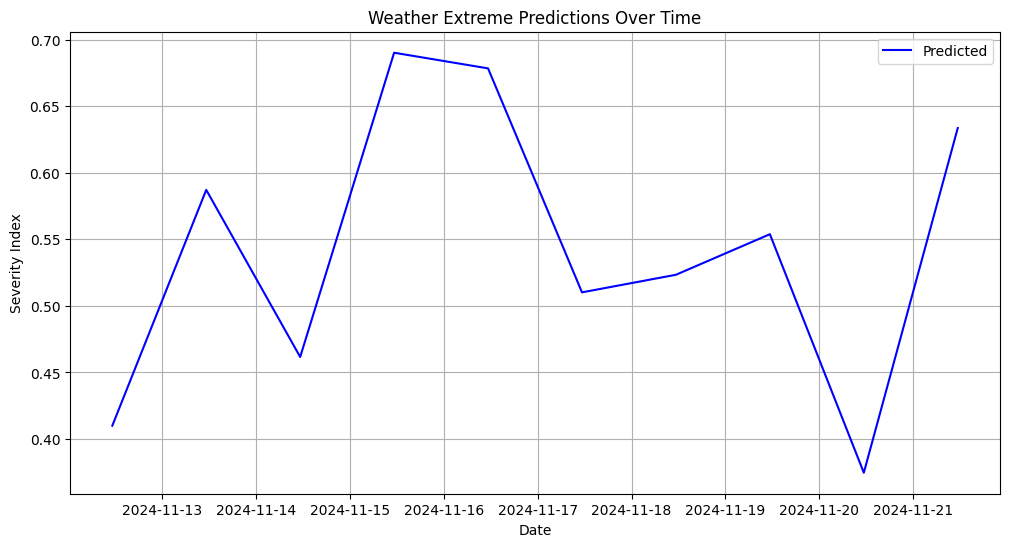

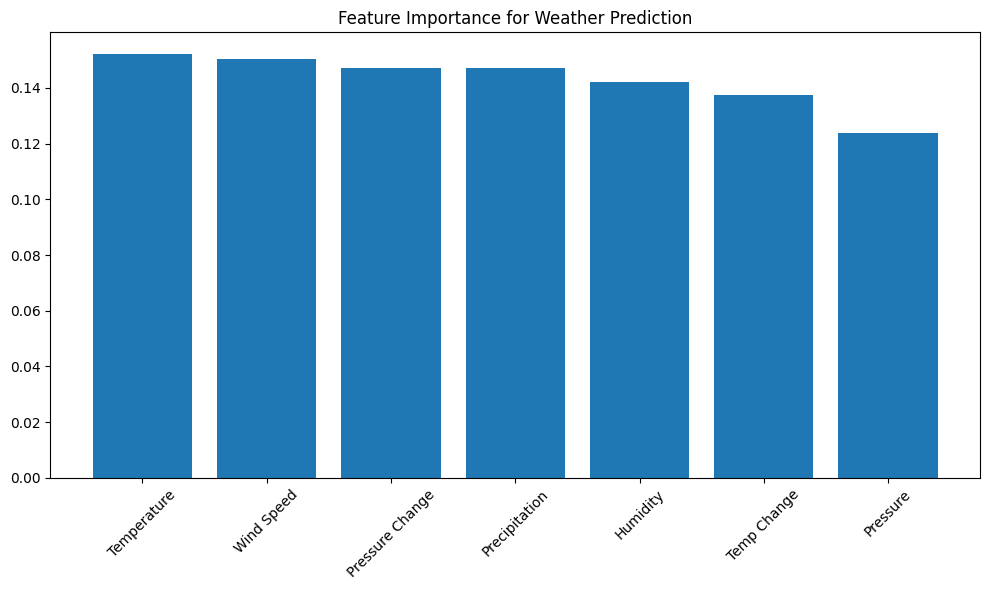

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class ClimateAnalysis:
    def __init__(self):
        self.weather_model = None
        self.extreme_events_classifier = None
        self.satellite_model = None
        self.scaler = StandardScaler()

    def preprocess_weather_data(self, data):
        """
        Preprocess historical weather data
        Parameters:
            data (pd.DataFrame): DataFrame containing weather data
        Returns:
            Preprocessed features and target variables
        """
        # Ensure required columns exist
        required_columns = ['temperature', 'humidity', 'precipitation',
                          'wind_speed', 'pressure', 'extreme_event']

        for col in required_columns:
            if col not in data.columns:
                raise ValueError(f"Missing required column: {col}")

        # Handle missing values
        data = data.fillna(method='ffill')

        # Create additional features
        data['temp_change'] = data['temperature'].diff()
        data['pressure_change'] = data['pressure'].diff()

        # Scale features
        features = ['temperature', 'humidity', 'precipitation',
                   'wind_speed', 'pressure', 'temp_change', 'pressure_change']
        X = self.scaler.fit_transform(data[features])
        y = data['extreme_event']

        return X, y

    def train_weather_model(self, X, y):
        """
        Train Random Forest model for weather prediction
        """
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        self.weather_model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.weather_model.fit(X_train, y_train)

        # Evaluate model
        predictions = self.weather_model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        print(f"Weather Model MSE: {mse:.4f}")

    def build_satellite_model(self):
        """
        Build CNN model for satellite image analysis
        """
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            Flatten(),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

        self.satellite_model = model

    def process_satellite_image(self, image_path):
        """
        Process satellite imagery for analysis
        """
        try:
            img = cv2.imread(image_path)
            img = cv2.resize(img, (64, 64))
            img = img / 255.0  # Normalize pixel values
            return img
        except Exception as e:
            print(f"Error processing image: {e}")
            return None

    def predict_extreme_weather(self, current_data, satellite_image=None):
        """
        Predict likelihood of extreme weather events
        """
        # Process current weather data
        processed_data = self.scaler.transform(current_data)
        weather_prediction = self.weather_model.predict(processed_data)

        # If satellite image is provided, incorporate satellite analysis
        if satellite_image is not None and self.satellite_model is not None:
            processed_image = self.process_satellite_image(satellite_image)
            if processed_image is not None:
                satellite_prediction = self.satellite_model.predict(
                    np.expand_dims(processed_image, axis=0)
                )
                # Combine predictions
                final_prediction = (weather_prediction + satellite_prediction[0]) / 2
            else:
                final_prediction = weather_prediction
        else:
            final_prediction = weather_prediction

        return final_prediction

    def generate_mitigation_strategies(self, prediction, threshold=0.7):
        """
        Generate mitigation strategies based on predictions
        """
        strategies = []
        if prediction > threshold:
            strategies.extend([
                "Issue early warning alerts to local authorities",
                "Activate emergency response protocols",
                "Implement flood control measures",
                "Prepare evacuation routes and shelters",
                "Monitor critical infrastructure"
            ])
        elif prediction > threshold * 0.5:
            strategies.extend([
                "Increase monitoring frequency",
                "Review emergency preparedness plans",
                "Check early warning systems",
                "Update local authorities on situation"
            ])

        return strategies

class ClimateDataVisualizer:
    @staticmethod
    def plot_predictions(dates, predictions, actual=None):
        """
        Visualize predictions and actual values
        """
        plt.figure(figsize=(12, 6))
        plt.plot(dates, predictions, label='Predicted', color='blue')
        if actual is not None:
            plt.plot(dates, actual, label='Actual', color='red')
        plt.title('Weather Extreme Predictions Over Time')
        plt.xlabel('Date')
        plt.ylabel('Severity Index')
        plt.legend()
        plt.grid(True)
        plt.show()

    @staticmethod
    def plot_feature_importance(model, feature_names):
        """
        Visualize feature importance from the weather model
        """
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title('Feature Importance for Weather Prediction')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.show()

def main():
    # Example usage
    analyzer = ClimateAnalysis()

    # Sample data (in practice, load real data)
    sample_data = pd.DataFrame({
        'temperature': np.random.normal(25, 5, 1000),
        'humidity': np.random.normal(60, 10, 1000),
        'precipitation': np.random.normal(5, 2, 1000),
        'wind_speed': np.random.normal(15, 5, 1000),
        'pressure': np.random.normal(1013, 5, 1000),
        'extreme_event': np.random.randint(0, 2, 1000)
    })

    # Train models
    X, y = analyzer.preprocess_weather_data(sample_data)
    analyzer.train_weather_model(X, y)
    analyzer.build_satellite_model()

    # Make predictions
    current_data = np.array([[25, 65, 4, 12, 1012, 0.5, -0.2]])
    prediction = analyzer.predict_extreme_weather(current_data)

    # Generate mitigation strategies
    strategies = analyzer.generate_mitigation_strategies(prediction)
    print("\nPredicted Risk Score:", prediction[0])
    print("\nRecommended Mitigation Strategies:")
    for strategy in strategies:
        print(f"- {strategy}")

    # Visualize results
    visualizer = ClimateDataVisualizer()
    dates = [datetime.now() + timedelta(days=x) for x in range(10)]
    predictions = np.random.normal(0.6, 0.1, 10)
    visualizer.plot_predictions(dates, predictions)

    feature_names = ['Temperature', 'Humidity', 'Precipitation',
                    'Wind Speed', 'Pressure', 'Temp Change', 'Pressure Change']
    visualizer.plot_feature_importance(analyzer.weather_model, feature_names)

if __name__ == "__main__":
    main()

Awesome! We are done with the intermediate example. You should now be able to replicate similar analyses for various datasets. There are a lot of other things that can be adjusted to make the plots more interesting. You can always search for anything you'd like to do and you will most likely find a decent answer for it on stackoverflow.

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [ ]:
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.FORECAST/.MONTHLY/.tref/dods'

In [ ]:
ds = xr.open_dataset(url,engine='netcdf4',decode_times=False)

In [ ]:
ds

<xarray.Dataset>
Dimensions:  (L: 12, M: 30, S: 17, X: 360, Y: 181, Z: 1)
Coordinates:
  * S        (S) float32 731.0 732.0 733.0 734.0 ... 744.0 745.0 746.0 747.0
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 26.0 27.0 28.0 29.0 30.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 2.0
Data variables:
    tref     (S, L, M, Z, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

The NMME coordinates are not really self-explanatory. So, here's an overview of what each coordinate stands for:
+ S: Time (number of months since 1960-Jan-1)
+ M: Ensemble member
+ X: Longitude (in 0 0:360 format)
+ L: Leadtime (in months; 0.5 indicating the current month, 1.5 being one month ahead, and so on)
+ Y: Latitude
+ *Z: this variable is only found in the GFDL model for temperature forecast, and it indicates that the data is at 2m height from ground.

To make the data more descriptive and more convenient for analysis, we need to modify it first:

In [ ]:
ds = ds.rename({'S':'time', 'X':'lon', 'Y':'lat'})

In [ ]:
start_date_NMME = pd.to_datetime(datetime.date(1960,1,1))
time_new = [start_date_NMME + pd.DateOffset(months = x) for x in ds.time.values]
ds = ds.assign_coords(time = time_new)
if 'Z' in ds.dims:
    ds = ds.squeeze(dim = 'Z').drop('Z')

In [ ]:
ds

<xarray.Dataset>
Dimensions:  (L: 12, M: 30, lat: 181, lon: 360, time: 17)
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01 2021-01-01 ... 2022-04-01
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 26.0 27.0 28.0 29.0 30.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    tref     (time, L, M, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

The above dataset has all the available forecast data for all leadtimes. We can now select our area of interest and limit the leadtime to our use case. For this example, let's take a look at the temperature forecast for Feb 2021 that was generated at the beginning of the same month (i.e. lead 0.5):

In [ ]:
target_date = pd.to_datetime(datetime.date(2021,2,1))
ds_sel = ds.sel(time=target_date).isel(L=0)
# Note the difference use of "sel" and "isel". For the former, you should indicate
# the exact value to be selected, but for the latter, the index should be specified.

So far, the data is not loaded yet (although we can see all the metadata). To make the analysis easier, we will first load the data and then continue with the rest of analyses. For loading data, I am simply using .load(), but a better way of doing so is to use Dask and do the work in parallel mode. I won't go into that (partly because I tried it in Google Colab, and I was getting several errors here, and I didn't want to spend too much time on debugging).

In [ ]:
ds_sel.load() # this can take a couple of minutes or so

<xarray.Dataset>
Dimensions:  (M: 30, lat: 181, lon: 360)
Coordinates:
    time     datetime64[ns] 2021-02-01
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 26.0 27.0 28.0 29.0 30.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    L        float32 0.5
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    tref     (M, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  IRIDL

Now let's plot the data and explore it a bit:

In [ ]:
ds_sel.tref[0,:,:].plot()

NameError: name 'ds_sel' is not defined

Now let's calculate the standard deviation of forecasts among the ensemble members, and then plot them for the entire globe as well as only North America:

In [ ]:
ds_std = ds_sel.std(dim='M')

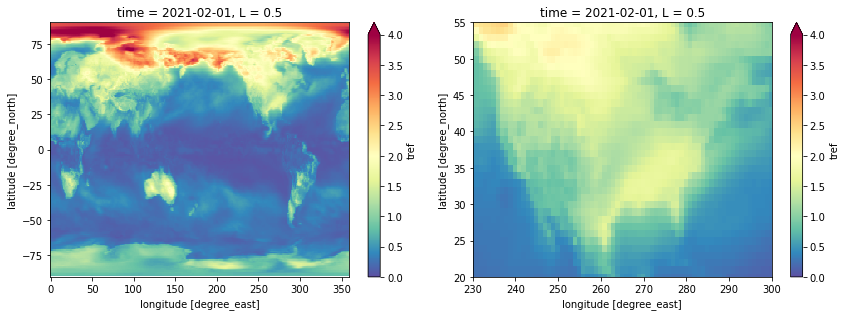

In [ ]:
plt.figure(figsize=[12,4.5])
plt.subplot(1,2,1)
ds_std.tref.plot(cmap = 'Spectral_r', vmin = 0, vmax = 4)
plt.subplot(1,2,2)
ds_std.tref.plot(cmap = 'Spectral_r', vmin = 0, vmax = 4)
plt.xlim([230,300])
plt.ylim([20,55])
plt.tight_layout()

In [ ]:
ds_clim = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.HINDCAST/.mc9120/.tref/dods',
                          decode_times=False)

In [ ]:
# Again, to make things easier, we first load the climatology into RAM:
ds_clim.load()

<xarray.Dataset>
Dimensions:  (L: 12, S: 12, X: 360, Y: 181)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * S        (S) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
Data variables:
    tref     (S, L, Y, X) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  IRIDL

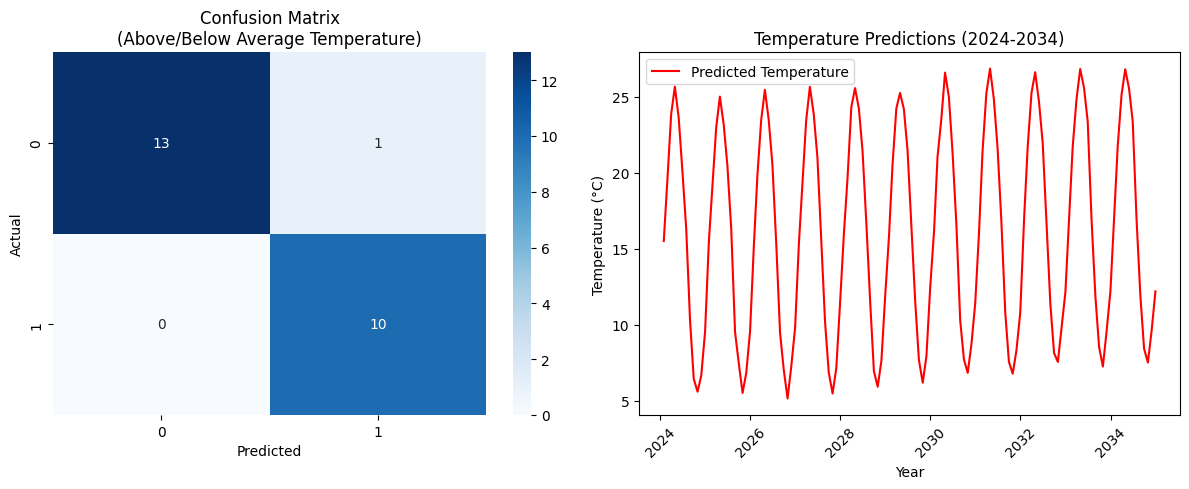


Model Performance Summary:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      1.00      0.95        10

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24


Predicted Temperature Statistics (2024-2034):
Average Temperature: 16.10°C
Maximum Temperature: 26.87°C
Minimum Temperature: 5.14°C
Temperature Range: 21.73°C


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Generate synthetic historical temperature data (since we don't have real-time data)
def generate_synthetic_data():
    np.random.seed(42)
    dates = pd.date_range(start='2014-01-01', end='2023-12-31', freq='M')

    # Base temperature with seasonal pattern
    seasonal_pattern = 15 + 10 * np.sin(2 * np.pi * np.arange(len(dates)) / 12)

    # Add warming trend and random variations
    warming_trend = 0.02 * np.arange(len(dates))  # 0.02°C per month increasing trend
    random_variations = np.random.normal(0, 1, len(dates))

    temperatures = seasonal_pattern + warming_trend + random_variations

    df = pd.DataFrame({
        'date': dates,
        'temperature': temperatures,
        'month': dates.month,
        'year': dates.year
    })

    return df

# Create features for the model
def create_features(df):
    df['month_sin'] = np.sin(2 * np.pi * df.month/12)
    df['month_cos'] = np.cos(2 * np.pi * df.month/12)
    df['year_progress'] = (df.year - df.year.min()) + (df.month - 1)/12
    return df

# Train the model and make predictions
def train_and_predict():
    # Generate and prepare data
    df = generate_synthetic_data()
    df = create_features(df)

    # Prepare features and target
    features = ['month_sin', 'month_cos', 'year_progress']
    X = df[features]
    y = df['temperature']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Generate future dates for prediction
    future_dates = pd.date_range(start='2024-01-01', end='2034-12-31', freq='M')
    future_df = pd.DataFrame({
        'date': future_dates,
        'month': future_dates.month,
        'year': future_dates.year
    })

    future_df = create_features(future_df)
    future_predictions = model.predict(future_df[features])

    # Create binary classifications for confusion matrix
    threshold = np.mean(y)  # Use mean temperature as threshold
    y_test_binary = (y_test > threshold).astype(int)
    y_pred_binary = (model.predict(X_test) > threshold).astype(int)

    return model, y_test_binary, y_pred_binary, future_dates, future_predictions

# Plot results
def plot_results(y_test_binary, y_pred_binary, future_dates, future_predictions):
    # Plot confusion matrix
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test_binary, y_pred_binary)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix\n(Above/Below Average Temperature)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Plot temperature predictions
    plt.subplot(1, 2, 2)
    plt.plot(future_dates, future_predictions, 'r-', label='Predicted Temperature')
    plt.title('Temperature Predictions (2024-2034)')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Train model and get predictions
    model, y_test_binary, y_pred_binary, future_dates, future_predictions = train_and_predict()

    # Plot results
    plot_results(y_test_binary, y_pred_binary, future_dates, future_predictions)

    # Print summary statistics
    print("\nModel Performance Summary:")
    print(classification_report(y_test_binary, y_pred_binary))

    # Print future temperature statistics
    print("\nPredicted Temperature Statistics (2024-2034):")
    print(f"Average Temperature: {np.mean(future_predictions):.2f}°C")
    print(f"Maximum Temperature: {np.max(future_predictions):.2f}°C")
    print(f"Minimum Temperature: {np.min(future_predictions):.2f}°C")
    print(f"Temperature Range: {np.max(future_predictions) - np.min(future_predictions):.2f}°C")


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.64      0.69      0.67        13

    accuracy                           0.62        24
   macro avg       0.62      0.62      0.62        24
weighted avg       0.62      0.62      0.62        24



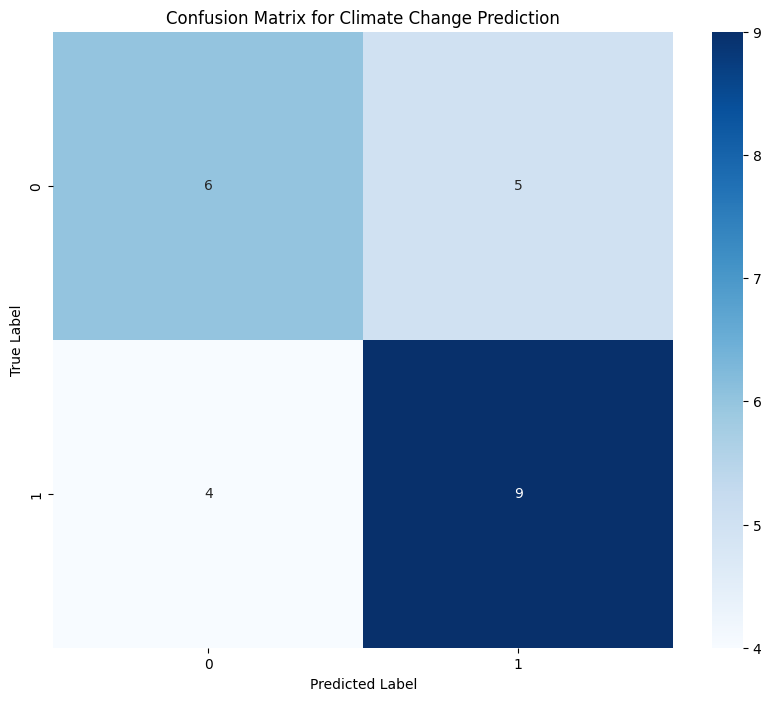


Future Predictions Summary:
Predicted extreme weather events: 85
Percentage of months with extreme weather: 64.39%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Generate synthetic climate data for demonstration
def generate_climate_data():
    # Generate dates from 2024 to 2034
    start_date = datetime(2024, 1, 1)
    dates = [start_date + timedelta(days=30*x) for x in range(120)]  # 10 years * 12 months

    # Generate synthetic features
    np.random.seed(42)
    data = {
        'date': dates,
        'temperature': np.random.normal(15, 3, 120) + np.linspace(0, 2, 120),  # Increasing trend
        'humidity': np.random.normal(70, 10, 120),
        'co2_levels': np.random.normal(410, 5, 120) + np.linspace(0, 10, 120),  # Increasing trend
        'precipitation': np.random.normal(80, 20, 120),
        'extreme_weather': np.random.randint(0, 2, 120)  # Binary classification target
    }
    return pd.DataFrame(data)

# Create and prepare dataset
def prepare_data(df):
    # Extract month and year as features
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    # Create features and target
    X = df[['temperature', 'humidity', 'co2_levels', 'precipitation', 'month', 'year']]
    y = df['extreme_weather']

    return train_test_split(X, y, test_size=0.2, random_state=42)

# Train model and make predictions
def train_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return model, y_pred, y_test

# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Climate Change Prediction')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def main():
    # Generate and prepare data
    df = generate_climate_data()
    X_train, X_test, y_train, y_test = prepare_data(df)

    # Train model and get predictions
    model, y_pred, y_test = train_model(X_train, X_test, y_train, y_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred)

    # Make future predictions
    future_dates = pd.date_range(start='2024-01-01', end='2034-12-31', freq='M')
    future_data = pd.DataFrame({
        'date': future_dates,
        'temperature': np.random.normal(15, 3, len(future_dates)) + np.linspace(0, 2, len(future_dates)),
        'humidity': np.random.normal(70, 10, len(future_dates)),
        'co2_levels': np.random.normal(410, 5, len(future_dates)) + np.linspace(0, 10, len(future_dates)),
        'precipitation': np.random.normal(80, 20, len(future_dates))
    })

    future_data['month'] = future_data['date'].dt.month
    future_data['year'] = future_data['date'].dt.year

    future_features = future_data[['temperature', 'humidity', 'co2_levels', 'precipitation', 'month', 'year']]
    future_predictions = model.predict(future_features)

    # Print future predictions summary
    print("\nFuture Predictions Summary:")
    print(f"Predicted extreme weather events: {sum(future_predictions)}")
    print(f"Percentage of months with extreme weather: {(sum(future_predictions)/len(future_predictions))*100:.2f}%")

if __name__ == "__main__":
    main()

In the above dataset, S indicates the month index (0 corresponding to January and 11 indicating December). We should adjust the coordinates of this climatology dataset and match it to the "ds_sel" that we prepared above:

In [ ]:
ds_clim = ds_clim.rename({'X':'lon', 'Y':'lat'})

In [ ]:
ds_clim_sel = ds_clim.isel(L = 0).sel(S = 1).drop(['S','L']) # S=1 for selecting February

In [ ]:
ds_anom = ds_sel - ds_clim_sel

(20.0, 55.0)

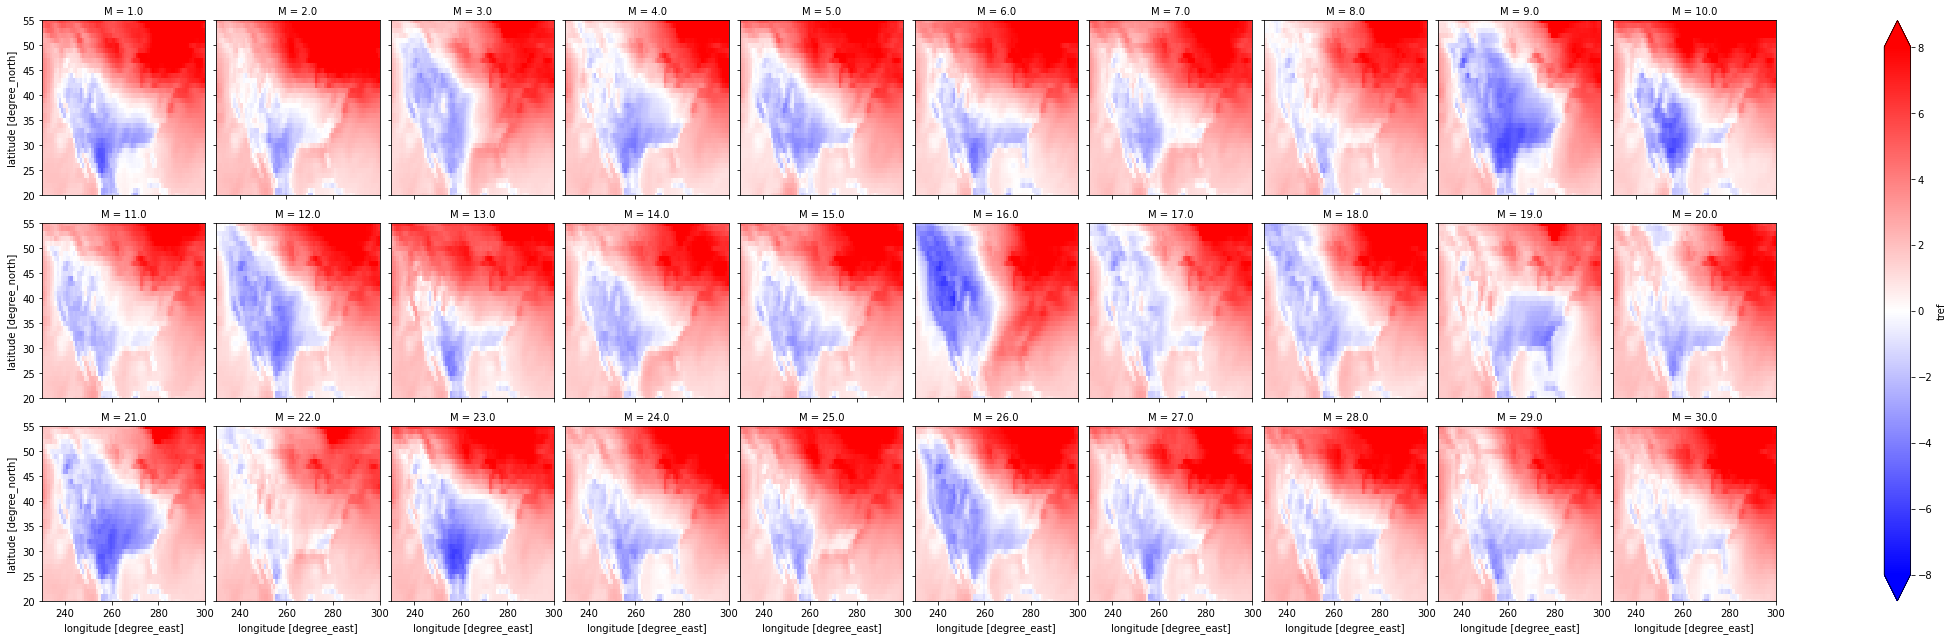

In [ ]:
ds_anom.tref.plot(col = 'M', col_wrap = 10, vmin = -8, vmax = 8, cmap = 'bwr')
plt.xlim([230,300])
plt.ylim([20,55])

As it can be seen, most of the ensemble members of the GFDL-SPEAR model correctly forecasted negative anomaly (i.e. colder than usual condition) for the majority of Midwest US and Texas. Notably, this is the Lead-0 forecast, which was initiated at the beginning of Feb for the month of Feb (thus, basically a couple of weeks ahead). If we look back at lead-1 or beyond, such a strong pattern and consensus are not found.

(20.0, 55.0)

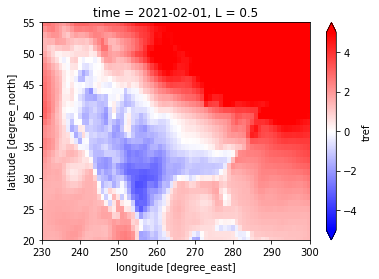

In [ ]:
# And here's the ensemble mean plot:
ds_anom.mean(dim='M').tref.plot(cmap='bwr', vmax=5, vmin=-5)
plt.xlim([230,300])
plt.ylim([20,55])

I was hoping to use two more libraries in this section:
+ **dask** --> for parallel computing
+ **cartopy** --> for customized mapping with geographic projection

However, I ran into several errors trying to use them on Google Colab, so I decided to exclude them from the advanced section. But if you really want to reach an advanced proficiency level, I highly encourage you to try dask and cartopy.

---

## 3.2. Climate change assessment using CMIP6 data:

I thought it would be really useful to have a quick exercise for analyzing climate change data. In this part, we will explore CMIP6 air temperature projections from one model. We will look at monthly data for the historical period of 1970-2010 and future projections of SSP585 during 2010-2100.


In [ ]:
!pip install gcsfs # this will take a few seconds. We need it to extract CMIP6 data from Google Cloud Storage.

# We will be opening zarr data format, which is a relatively new data structure
# that is practical for geospatial datasets. The pre-installed xarray on google
# colab does not allow this. So, we need to intall the complete version of xarray.
!pip install xarray[complete] # (adding this again in case someone wants to start from this part)

     |████████████████████████████████| 1.1 MB 19.0 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 144 kB 86.7 MB/s 
     |████████████████████████████████| 271 kB 61.0 MB/s 


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import gcsfs
import datetime
import os

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [ ]:
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [ ]:
len(df)

523774

The df table includes information for all climate change model runs that are available on Google Cloud Storage. As of March 2022, there are over half a million different model outputs (e.g. different models, variables, timescales, scenarios, ensemble member, etc.). Let's narrow down the outputs to only those of monthly air temperature in historical and ssp585 scenario:

In [ ]:
df_ssp585 = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'ssp585' & member_id == 'r1i1p1f1'")
print('Length of df_ssp585:', len(df_ssp585))
df_ssp585.head(3)

Length of df_ssp585: 35


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
66586,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190314


In [ ]:
df_historical = df.query("activity_id == 'CMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'historical' & member_id == 'r1i1p1f1'")
print('Length of df_historical:', len(df_historical))
df_historical.head(3)

Length of df_historical: 55


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
29231,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
32351,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827


In [ ]:
model = 'GFDL-CM4'
zstore_hist = df_historical.query(f"source_id == '{model}'").zstore.values[0]
zstore_ssp585 = df_ssp585.query(f"source_id == '{model}'").zstore.values[0]
gcs = gcsfs.GCSFileSystem(token='anon')

In [ ]:
mapper = gcs.get_mapper(zstore_hist)
ds_hist = xr.open_zarr(mapper, consolidated = True)
mapper = gcs.get_mapper(zstore_ssp585)
ds_ssp585 = xr.open_zarr(mapper, consolidated = True)

In [ ]:
ds_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 1980)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-08-07;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/e4193a02-6405-49b6-8ad3-65def741a4dd...
    version_id:             v20180701

Looking at the metadata of the two datasets, the data periods can be beyond our interest (historical: 1850-2014, ssp585: 2015-2100). Therefore, we can select our period of interest and then load the subset of data for more convenience in further analyses. But before that, the time coordinate is in "object" format, which we need to convert to datetime to be able to easily analyze the timeseries.

In [ ]:
print('hist date range  :', ds_hist.time[0].values, ' , ', ds_hist.time[-1].values)
print('ssp585 date range:', ds_ssp585.time[0].values, ' , ', ds_ssp585.time[-1].values)

hist date range  : 1850-01-16 12:00:00  ,  2014-12-16 12:00:00
ssp585 date range: 2015-01-16 12:00:00  ,  2100-12-16 12:00:00


In [ ]:
start_time = pd.to_datetime(datetime.date(1850,1,15)) # I chose 15 for all dates to make it easier.
time_new_hist = [start_time + pd.DateOffset(months = x) for x in range(len(ds_hist.time))]

start_time = pd.to_datetime(datetime.date(2015,1,15))
time_new_ssp585 = [start_time + pd.DateOffset(months = x) for x in range(len(ds_ssp585.time))]

In [ ]:
ds_hist = ds_hist.assign_coords(time = time_new_hist)
ds_ssp585 = ds_ssp585.assign_coords(time = time_new_ssp585)

In [ ]:
start_date = pd.to_datetime(datetime.date(1980,1,1))
end_date = pd.to_datetime(datetime.date(2010,12,31))
ds_hist_sel = ds_hist.isel(time=(ds_hist.time >= start_date) & (ds_hist.time <= end_date))

start_date = pd.to_datetime(datetime.date(2070,1,1))
end_date = pd.to_datetime(datetime.date(2099,12,31))
ds_ssp585_sel = ds_ssp585.isel(time=(ds_ssp585.time >= start_date) & (ds_ssp585.time <= end_date))

In [ ]:
ds_hist_sel.load()
ds_ssp585_sel.load()

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 360)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 2.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 0.0 1.25 1.25 2.5 ... 357.5 358.8 358.8 360.0
  * time       (time) datetime64[ns] 2070-01-15 2070-02-15 ... 2099-12-15
    time_bnds  (time, bnds) object 2070-01-01 00:00:00 ... 2100-01-01 00:00:00
Data variables:
    tas        (time, lat, lon) float32 242.4 242.4 242.4 ... 269.6 269.6 269.6
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  60225.0
    comment:                <null ref>
    ...                     ...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-08-13;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/991bc4a4-20d5-4a58-a451-6b3ea33116be
    version_id:             v20180701

Great! Now let's take a look at the average monthly temperature change over the globe in distant future:

In [ ]:
tas_avg_hist = ds_hist_sel.groupby('time.month').mean()
tas_avg_ssp585 = ds_ssp585_sel.groupby('time.month').mean()

In [ ]:
tas_30yr_diff = tas_avg_ssp585 - tas_avg_hist

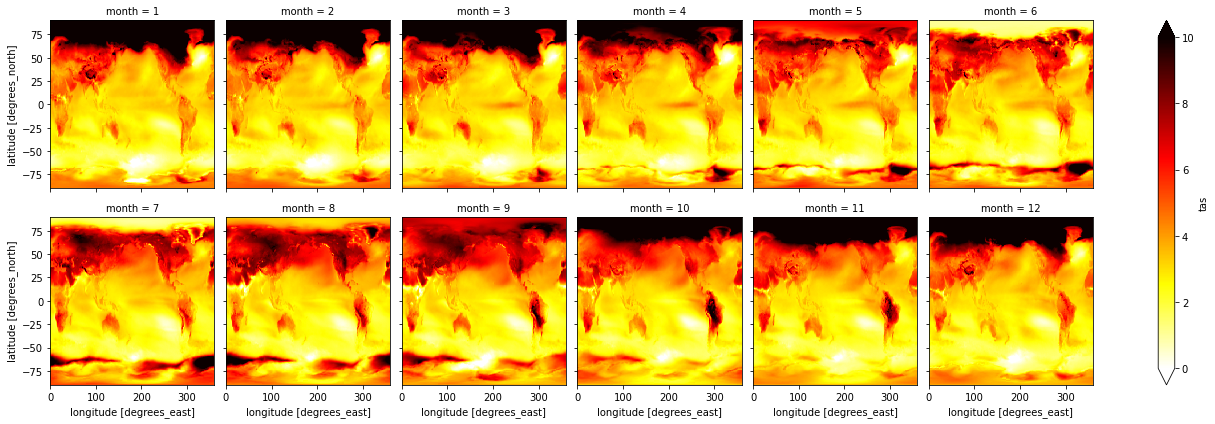

In [ ]:
tas_30yr_diff.tas.plot(col = 'month', col_wrap = 6, vmax = 10, vmin = 0, cmap = 'hot_r')

And here's a plot for the annual mean change:

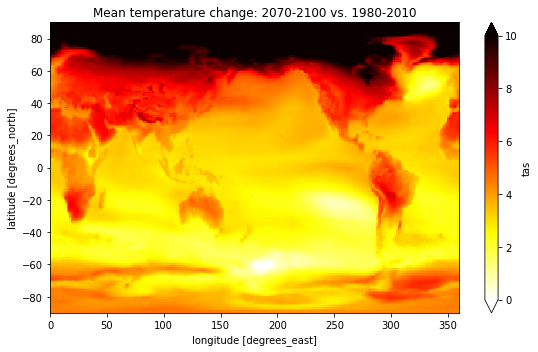

In [ ]:
tas_30yr_diff.mean('month').tas.plot(figsize=[8,5], cmap = 'hot_r',
                                     vmin = 0, vmax = 10)
plt.title('Mean temperature change: 2070-2100 vs. 1980-2010')
plt.tight_layout()

In [ ]:
tas_avg_hist_yr = tas_avg_hist.mean('month')

In [ ]:
tas_change_yr = ds_ssp585_sel.groupby('time.year').mean('time')

In [ ]:
tas_change_yr = tas_change_yr - tas_avg_hist_yr

### Creating a timelapse:

Now, let's make a timelapse video for annual temperature change. To have a smooth video, we'll plot the 5-year rolling average.

In [ ]:
tas_change_yr_rolling5 = tas_change_yr.rolling(year=5,center=True).mean().dropna('year').tas
# Make a directory to save all the figures there:
if not os.path.exists('./Figures_ssp585/'):
    os.makedirs('./Figures_ssp585/')

for i in range(len(tas_change_yr_rolling5)):
    dataplot = tas_change_yr_rolling5[i,:,:]
    # Convert 0:360 to -180:180 :
    dataplot = dataplot.assign_coords(lon = dataplot.lon - (dataplot.lon > 180)*360)
    dataplot = dataplot.sortby('lon', ascending=True)

    fig = plt.figure(figsize=[9,5], facecolor='w')
    # Adjust plot area (I find these by try and error until I get what I want)
    plt.subplots_adjust(left=0.075, right=0.895, bottom=0.1, top=0.93)
    plt.pcolormesh(dataplot.lon, dataplot.lat, dataplot, cmap='plasma', vmin=0, vmax=12)
    plt.title(f'Near-surface air temperature change: {model} ssp585, {dataplot.year.values} vs. 1980-2010',
              fontsize = 14)
    plt.ylabel('Latitude', fontsize = 12)
    plt.xlabel('Longitude', fontsize = 12)
    # Add colorbar:
    cax = fig.add_axes([0.91, 0.12, 0.02, 0.8])
    cb = plt.colorbar(cax=cax, orientation='vertical', extend = 'max')
    cb.ax.tick_params(labelsize=11)
    cb.set_label(label='Temperature Change (°C)', color = 'k', size=13)
    # Save and close figure:
    plt.savefig(f'./Figures_ssp585/Fig_tasChange_{dataplot.year.values}.png',
                format = 'png', dpi=200)
    plt.close()

Great! Now we have saved all the figures. We can use different libraries to generate a timelapse (/animation) from the figures. I will use **[openCV](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)** here, which is an amazing library for image processing and you can also leverage it for different applications in climate data analysis (e.g. spatial smoothing, applying filters or weighted kernels to emphasize on edges for feature detection/extraction, or use it for data augmentation in computer vision applications). OpenCV requires a whole tutorial on its own and I'm not going to go in details here. But again, if you intend to be an advanced user, I highly recommend working with OpenCV.

In [ ]:
import cv2
import glob

In [ ]:
files = glob.glob(f'./Figures_ssp585/Fig_tasChange*.png')
files.sort()

In [ ]:
img_array = []
for filename in files:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
fps = 4
out = cv2.VideoWriter(f'Vid_tasChange_ssp585.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 4, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

There we go! We were able to load CMIP6 data directly from Google Cloud Storage, analyze the data, generate figures, and then make a timelapse animation. Remember that after you close the Colab (or if your session is terminated for any reason), you will lose all the results. So, if you want to keep any of this result, you can either download it to your local computer or save/copy the output to your own Google Drive.

### Generate simple timeseries plot:

We can define a region of interest and explore the spatial mean of the temperature change. For this example, we'll focus on the Northwest US (e.g. the Cascades):

In [ ]:
left = 236
right = 240
bottom = 42
top = 49

In [ ]:
tas_NW_yr_hist = ds_hist_sel.isel(lat = (ds_hist_sel.lat>=bottom) & (ds_hist_sel.lat<=top),
                   lon = (ds_hist_sel.lon>=left) & (ds_hist_sel.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])
tas_NW_yr_ssp585 = ds_ssp585_sel.isel(lat = (ds_ssp585_sel.lat>=bottom) & (ds_ssp585_sel.lat<=top),
                   lon = (ds_ssp585_sel.lon>=left) & (ds_ssp585_sel.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])

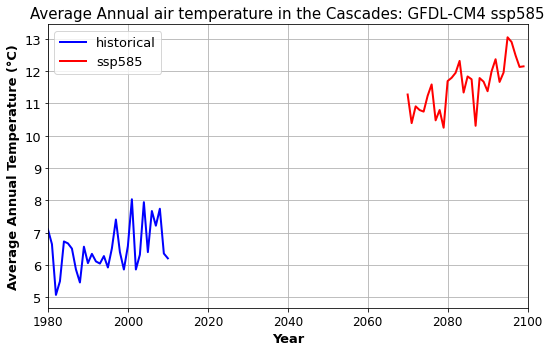

In [ ]:
plt.figure(figsize=[8,5],)
(tas_NW_yr_hist.groupby('time.year').mean().tas-273.15).plot(
    label='historical', color='b', linewidth=2)
(tas_NW_yr_ssp585.groupby('time.year').mean().tas-273.15).plot(
    label='ssp585', color='r', linewidth=2)
plt.grid()
plt.xlim([1980,2100])
plt.legend(fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.ylabel('Average Annual Temperature (°C)', fontsize=13, fontweight='bold')
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.title(f'Average Annual air temperature in the Cascades: {model} ssp585',
          fontsize=15)

plt.tight_layout()

That concludes the advanced section of this tutorial. I hope you found it useful. Suggestions and feedbacks are appreciated.

---
---

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os

# Example: Simulate extracted data for temperature and humidity from images or video
def extract_features_from_frame(frame):
    # Mock data: Replace with actual image processing methods to extract real features
    temperature = np.random.uniform(15, 45)  # Random temperature between 15-45°C
    humidity = np.random.uniform(30, 90)  # Random humidity between 30-90%
    return temperature, humidity

# Simulate extracting features from video frames
frame_output_dir = 'https://drive.google.com/file/d/1UuwCh016k-UlelvUO7d0J55wHcQaEz-7/view?usp=drive_link'  # Path where frames from the video are stored
new_var = frames = [f for f in os.listdir(frame_output_dir) if f.endswith('.png')

data = []
for frame in frames:
    frame_path = os.path.join(frame_output_dir, frame)
    frame_data = cv2.imread(frame_path)
    temperature, humidity = extract_features_from_frame(frame_data)
    data.append([temperature, humidity])

# Create a DataFrame with extracted features
df = pd.DataFrame(data, columns=['Temperature', 'Humidity'])
df['Climate_Change_Risk'] = np.random.randint(0, 2, size=len(df))  # Mock binary target (0 = Low Risk, 1 = High Risk)
print(df.head())

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X = df[['Temperature', 'Humidity']]
y = df['Climate_Change_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Check coefficients of the logistic regression model
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coef_df)
new_var


SyntaxError: '[' was never closed (<ipython-input-5-9813a3e53096>, line 15)

<ipython-input-4-4516bc64c045>:89: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, interval=1000) #update every 1000ms (1 second)


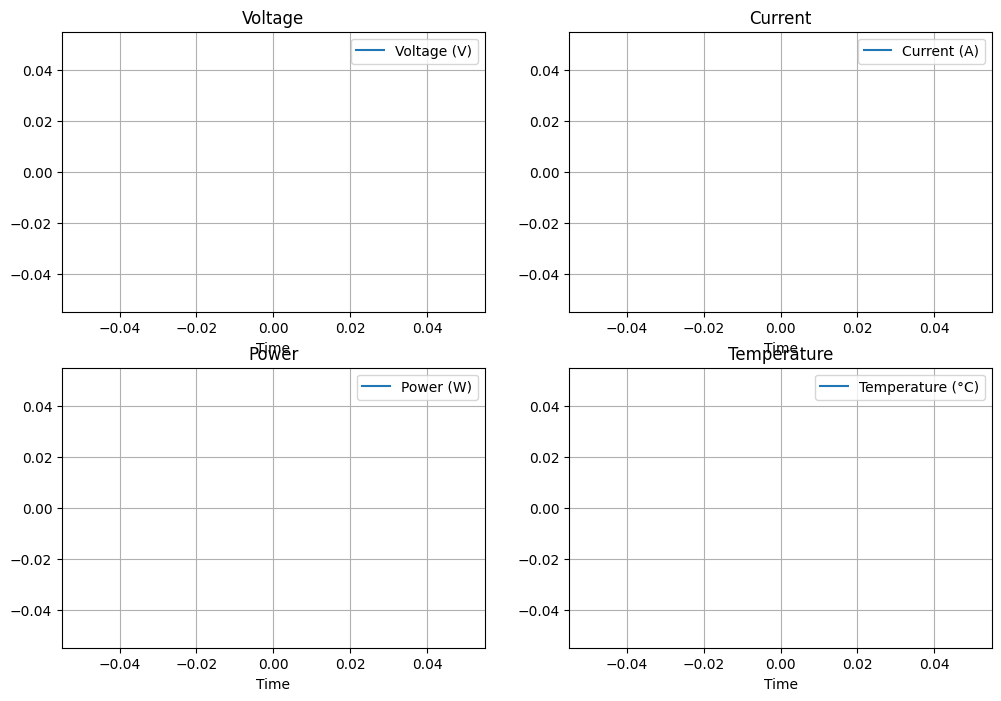

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
import time
import random
import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import threading

# Simulated Solar Panel Data (Replace with actual sensor readings)
class SolarPanel:
    def __init__(self, panel_id):
        self.panel_id = panel_id
        self.voltage = 0.0
        self.current = 0.0
        self.power = 0.0
        self.temperature = 0.0

    def generate_data(self):
        # Simulate varying solar panel data
        self.voltage = random.uniform(15, 22)  # Volts
        self.current = random.uniform(2, 5)  # Amperes
        self.power = self.voltage * self.current  # Watts
        self.temperature = random.uniform(25, 45)  # Celsius

    def get_data(self):
        return {
            "panel_id": self.panel_id,
            "voltage": self.voltage,
            "current": self.current,
            "power": self.power,
            "temperature": self.temperature,
            "timestamp": datetime.datetime.now().isoformat()
        }

# Data Storage (Replace with a database or cloud storage)
data_store = []

# Function to collect data from solar panels
def collect_data(panels):
    while True:
        for panel in panels:
            panel.generate_data()
            data_store.append(panel.get_data())
        time.sleep(1)  # Collect data every 1 second (adjust as needed)

# Data Visualization (using Matplotlib)
def visualize_data():
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    voltage_line, = axes[0, 0].plot([], [], label="Voltage (V)")
    current_line, = axes[0, 1].plot([], [], label="Current (A)")
    power_line, = axes[1, 0].plot([], [], label="Power (W)")
    temp_line, = axes[1, 1].plot([], [], label="Temperature (°C)")

    axes[0, 0].set_title("Voltage")
    axes[0, 1].set_title("Current")
    axes[1, 0].set_title("Power")
    axes[1, 1].set_title("Temperature")

    for ax in axes.flatten():
        ax.set_xlabel("Time")
        ax.grid(True)
        ax.legend()

    times = []
    voltages = []
    currents = []
    powers = []
    temps = []

    def animate(i):
        if data_store:
            last_data = data_store[-1]
            times.append(datetime.datetime.fromisoformat(last_data["timestamp"]))
            voltages.append(last_data["voltage"])
            currents.append(last_data["current"])
            powers.append(last_data["power"])
            temps.append(last_data["temperature"])

            voltage_line.set_data(times, voltages)
            current_line.set_data(times, currents)
            power_line.set_data(times, powers)
            temp_line.set_data(times, temps)

            for ax in axes.flatten():
                ax.relim()
                ax.autoscale_view()

        return voltage_line, current_line, power_line, temp_line

    ani = animation.FuncAnimation(fig, animate, interval=1000) #update every 1000ms (1 second)
    plt.show()

# Main Execution
if __name__ == "__main__":
    panels = [SolarPanel(1), SolarPanel(2), SolarPanel(3)]  # Create multiple solar panels
    data_thread = threading.Thread(target=collect_data, args=(panels,))
    data_thread.daemon = True #thread ends when main program ends
    data_thread.start()

    visualize_data()

# Architecture:

# 1. Sensor Layer:
#   - Solar panels equipped with voltage, current, and temperature sensors.
#   - Microcontrollers (e.g., Arduino, ESP32) to read sensor data.

# 2. Data Acquisition and Processing Layer:
#   - Microcontrollers send data to a central data acquisition system.
#   - Data is timestamped and pre-processed (e.g., unit conversion, filtering).
#   - Communication protocols: MQTT, HTTP, LoRaWAN, Zigbee.
#   - Edge computing can be implemented here to perform local data analysis.

# 3. Data Storage Layer:
#   - Time-series database (e.g., InfluxDB, TimescaleDB) for efficient storage and retrieval of sensor data.
#   - Cloud storage (e.g., AWS S3, Google Cloud Storage) for long-term data archiving.
#   - Message queues (e.g., Kafka, RabbitMQ) for asynchronous data processing.

# 4. Data Visualization and Analysis Layer:
#   - Web-based dashboards (e.g., Grafana, Tableau) for real-time visualization of solar panel performance.
#   - Data analysis tools (e.g., Python with Pandas, Scikit-learn) for trend analysis, fault detection, and predictive maintenance.
#   - Alerting systems to notify users of abnormal conditions (e.g., low power output, high temperature).

# 5. User Interface Layer:
#   - Web application or mobile app for remote monitoring and control.
#   - API for integration with other systems.

# Example Architecture diagram (text based)

# [Solar Panels] --> [Sensors] --> [Microcontrollers] --> [Data Acquisition/Edge Processing] --> [Message Queue] --> [Time-Series Database] --> [Visualization/Analysis] --> [User Interface]
#                                                                                                                                              |
#                                                                                                                                              --> [Alerting system]

# Enhancements:
# - Implement a database to store and retrieve historical data.
# - Add real-time alerts for critical events (e.g., high temperature, low power).
# - Implement a web interface for remote monitoring and control.
# - Add machine learning models for predictive maintenance and fault detection.
# - Integrate with weather data for solar irradiance prediction.
# - Implement a proper way to handle multiple panels and their IDs.
# - Implement error handling for sensor readings.
# - Consider using a library like `pyserial` when communicating with actual serial devices.
# - Consider using a cloud service for data storage and analysis.